In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
if not os.path.exists("./data_validation.csv"):
    data_frame = pd.read_csv("../../dataset/data-ori.csv")
    df_train, df_validation = train_test_split(
        data_frame,
        test_size=0.10,
        stratify=data_frame['SOURCE'],
    )
    
    df_train.to_csv("./data_train.csv", index=False)
    df_validation.to_csv("./data_validation.csv", index=False)

In [3]:
df_numerical=df_validation.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=df_validation.loc[:,['SEX','SOURCE']]

print("Data set shape: ",df_validation.shape)
print("Number of Duplicates: ",df_validation.duplicated().sum())
print("Nmber of NaN:", df_validation.isna().sum().sum())
print("\nData Info:")
df_validation.info()
print("\nData Head:")
df_validation.head()

Data set shape:  (442, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 2275 to 3280
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   442 non-null    float64
 1   HAEMOGLOBINS  442 non-null    float64
 2   ERYTHROCYTE   442 non-null    float64
 3   LEUCOCYTE     442 non-null    float64
 4   THROMBOCYTE   442 non-null    int64  
 5   MCH           442 non-null    float64
 6   MCHC          442 non-null    float64
 7   MCV           442 non-null    float64
 8   AGE           442 non-null    int64  
 9   SEX           442 non-null    object 
 10  SOURCE        442 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 41.4+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
2275,47.4,14.7,7.86,6.1,216,18.7,31.0,60.3,49,F,out
3443,43.8,14.5,4.74,4.5,226,30.6,33.1,92.4,66,M,out
4109,36.1,12.2,4.44,3.9,171,27.5,33.8,81.3,77,F,in
3009,31.1,10.7,3.98,25.1,174,26.9,34.4,78.1,60,M,in
303,45.2,14.7,5.48,2.7,135,26.8,32.5,82.5,12,M,in


In [4]:
df_validation.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,190
HAEMOGLOBINS,96
ERYTHROCYTE,233
LEUCOCYTE,149
THROMBOCYTE,258
MCH,111
MCHC,59
MCV,201
AGE,84
SEX,2


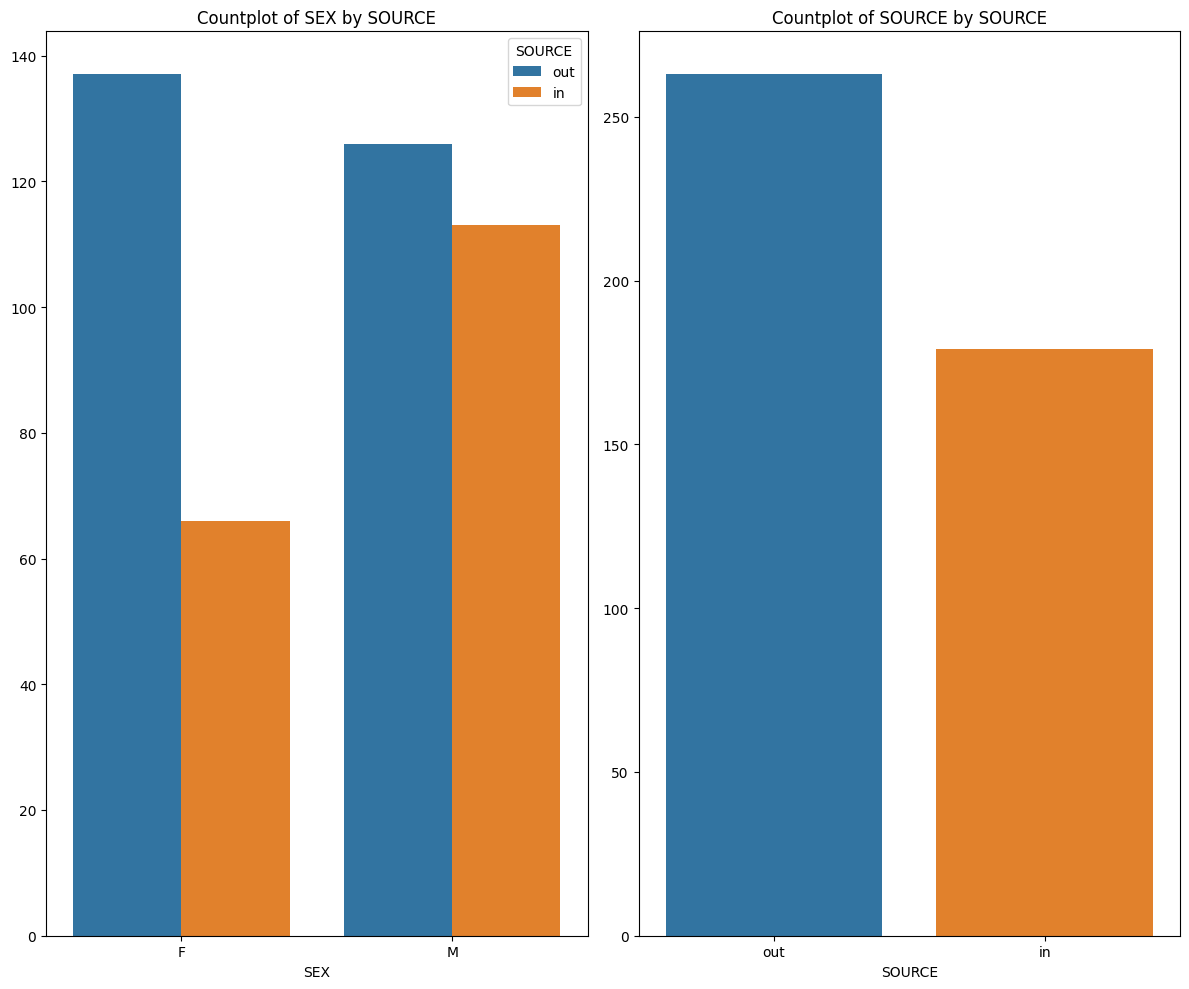

In [5]:
show_countplots_by_target(df_categorical, df_categorical.columns, "SOURCE")

In [6]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,442.0,38.399095,6.240832,13.70,34.725,39.00,43.1000,51.30
HAEMOGLOBINS,442.0,12.810860,2.193005,4.40,11.400,13.10,14.5000,17.10
ERYTHROCYTE,442.0,4.566652,0.815634,1.48,4.085,4.64,5.0875,7.86
LEUCOCYTE,442.0,8.851131,5.001525,1.50,5.800,7.65,10.5000,60.80
THROMBOCYTE,442.0,263.927602,114.612486,10.00,196.000,255.00,325.0000,974.00
MCH,442.0,28.226697,2.708978,15.90,27.200,28.80,29.8000,34.30
MCHC,442.0,33.327376,1.172724,28.00,32.700,33.30,34.0000,37.20
MCV,442.0,84.611086,7.017024,55.80,81.325,85.40,88.8000,102.80
AGE,442.0,47.554299,20.480022,1.00,32.000,49.00,64.7500,92.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

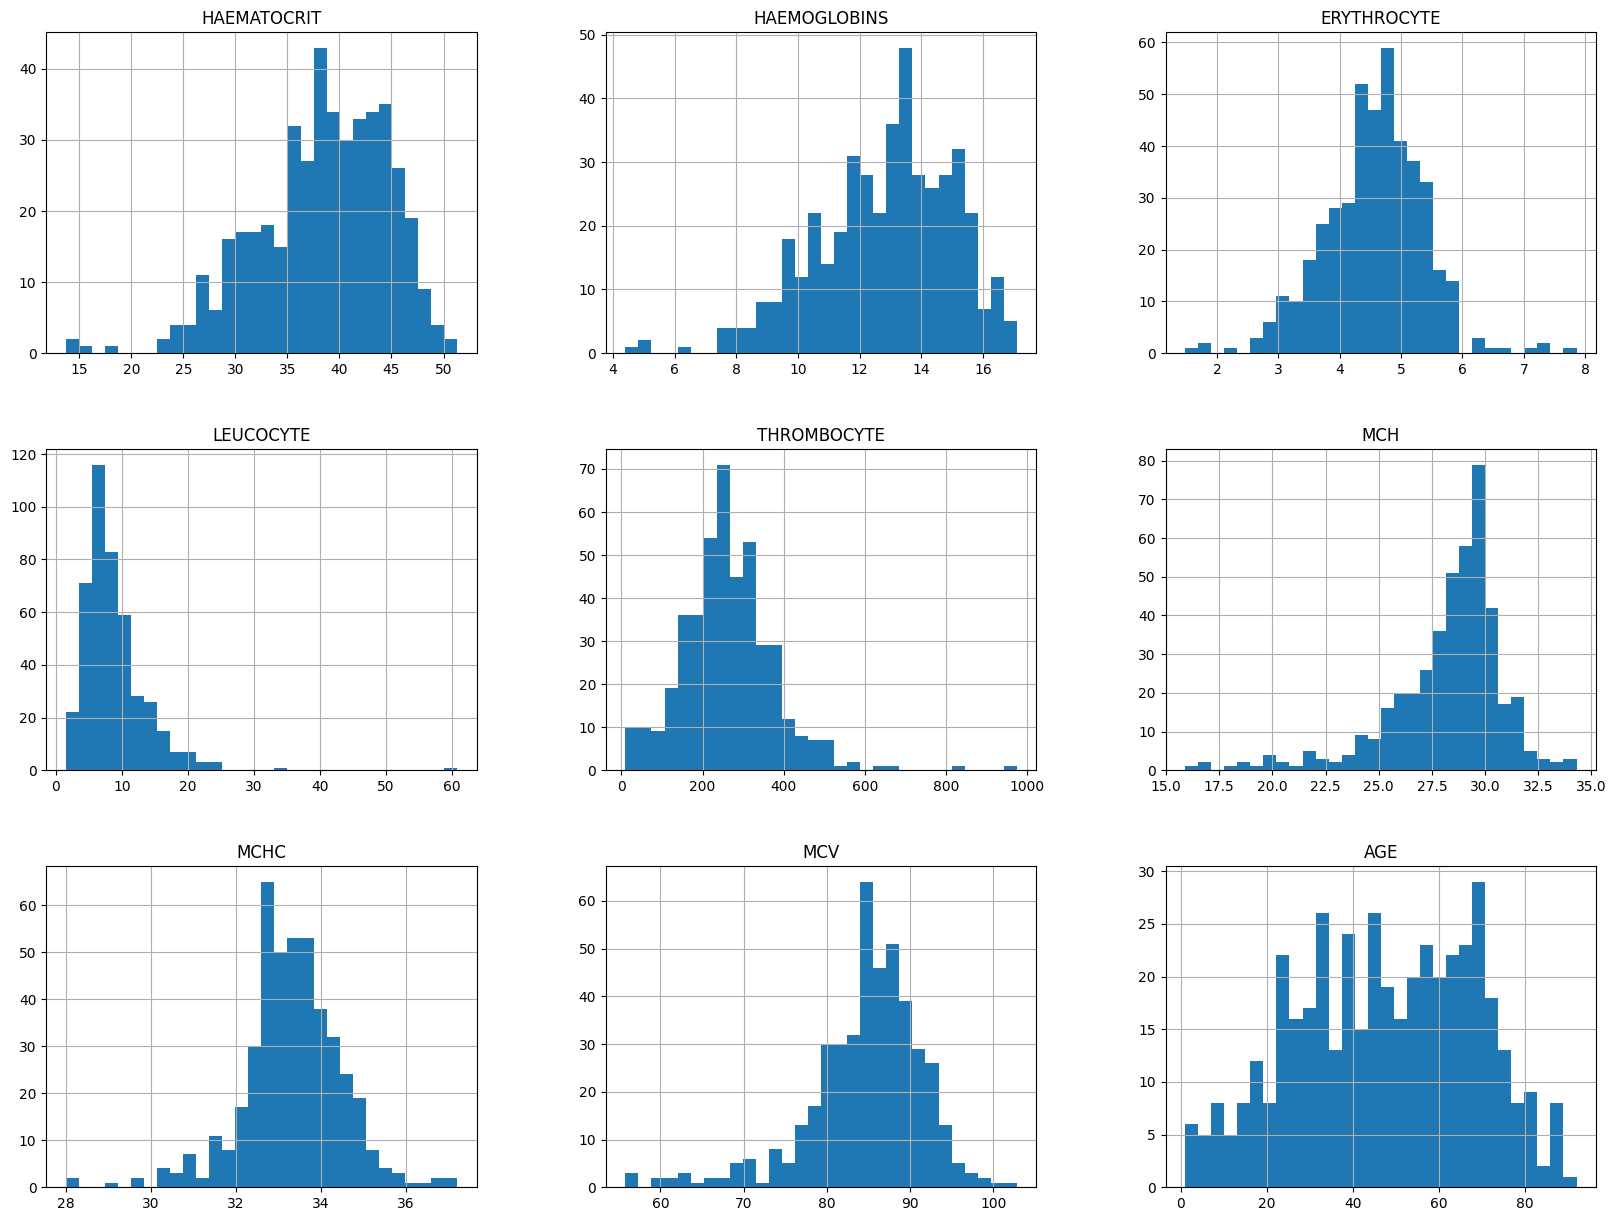

In [7]:
df_numerical.hist(bins=30, figsize=(20,15))

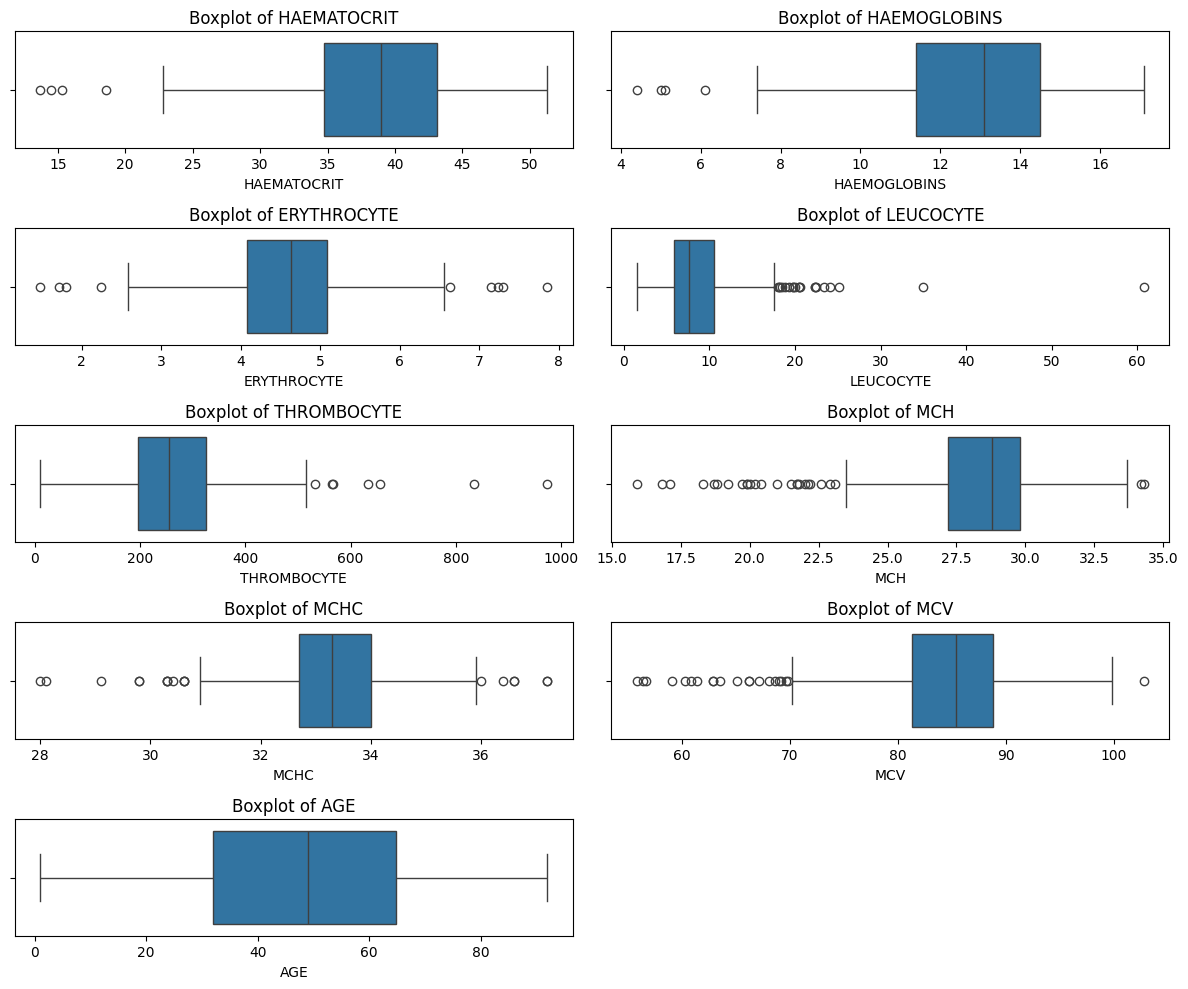

In [8]:
create_boxplots_from_df(df_numerical)

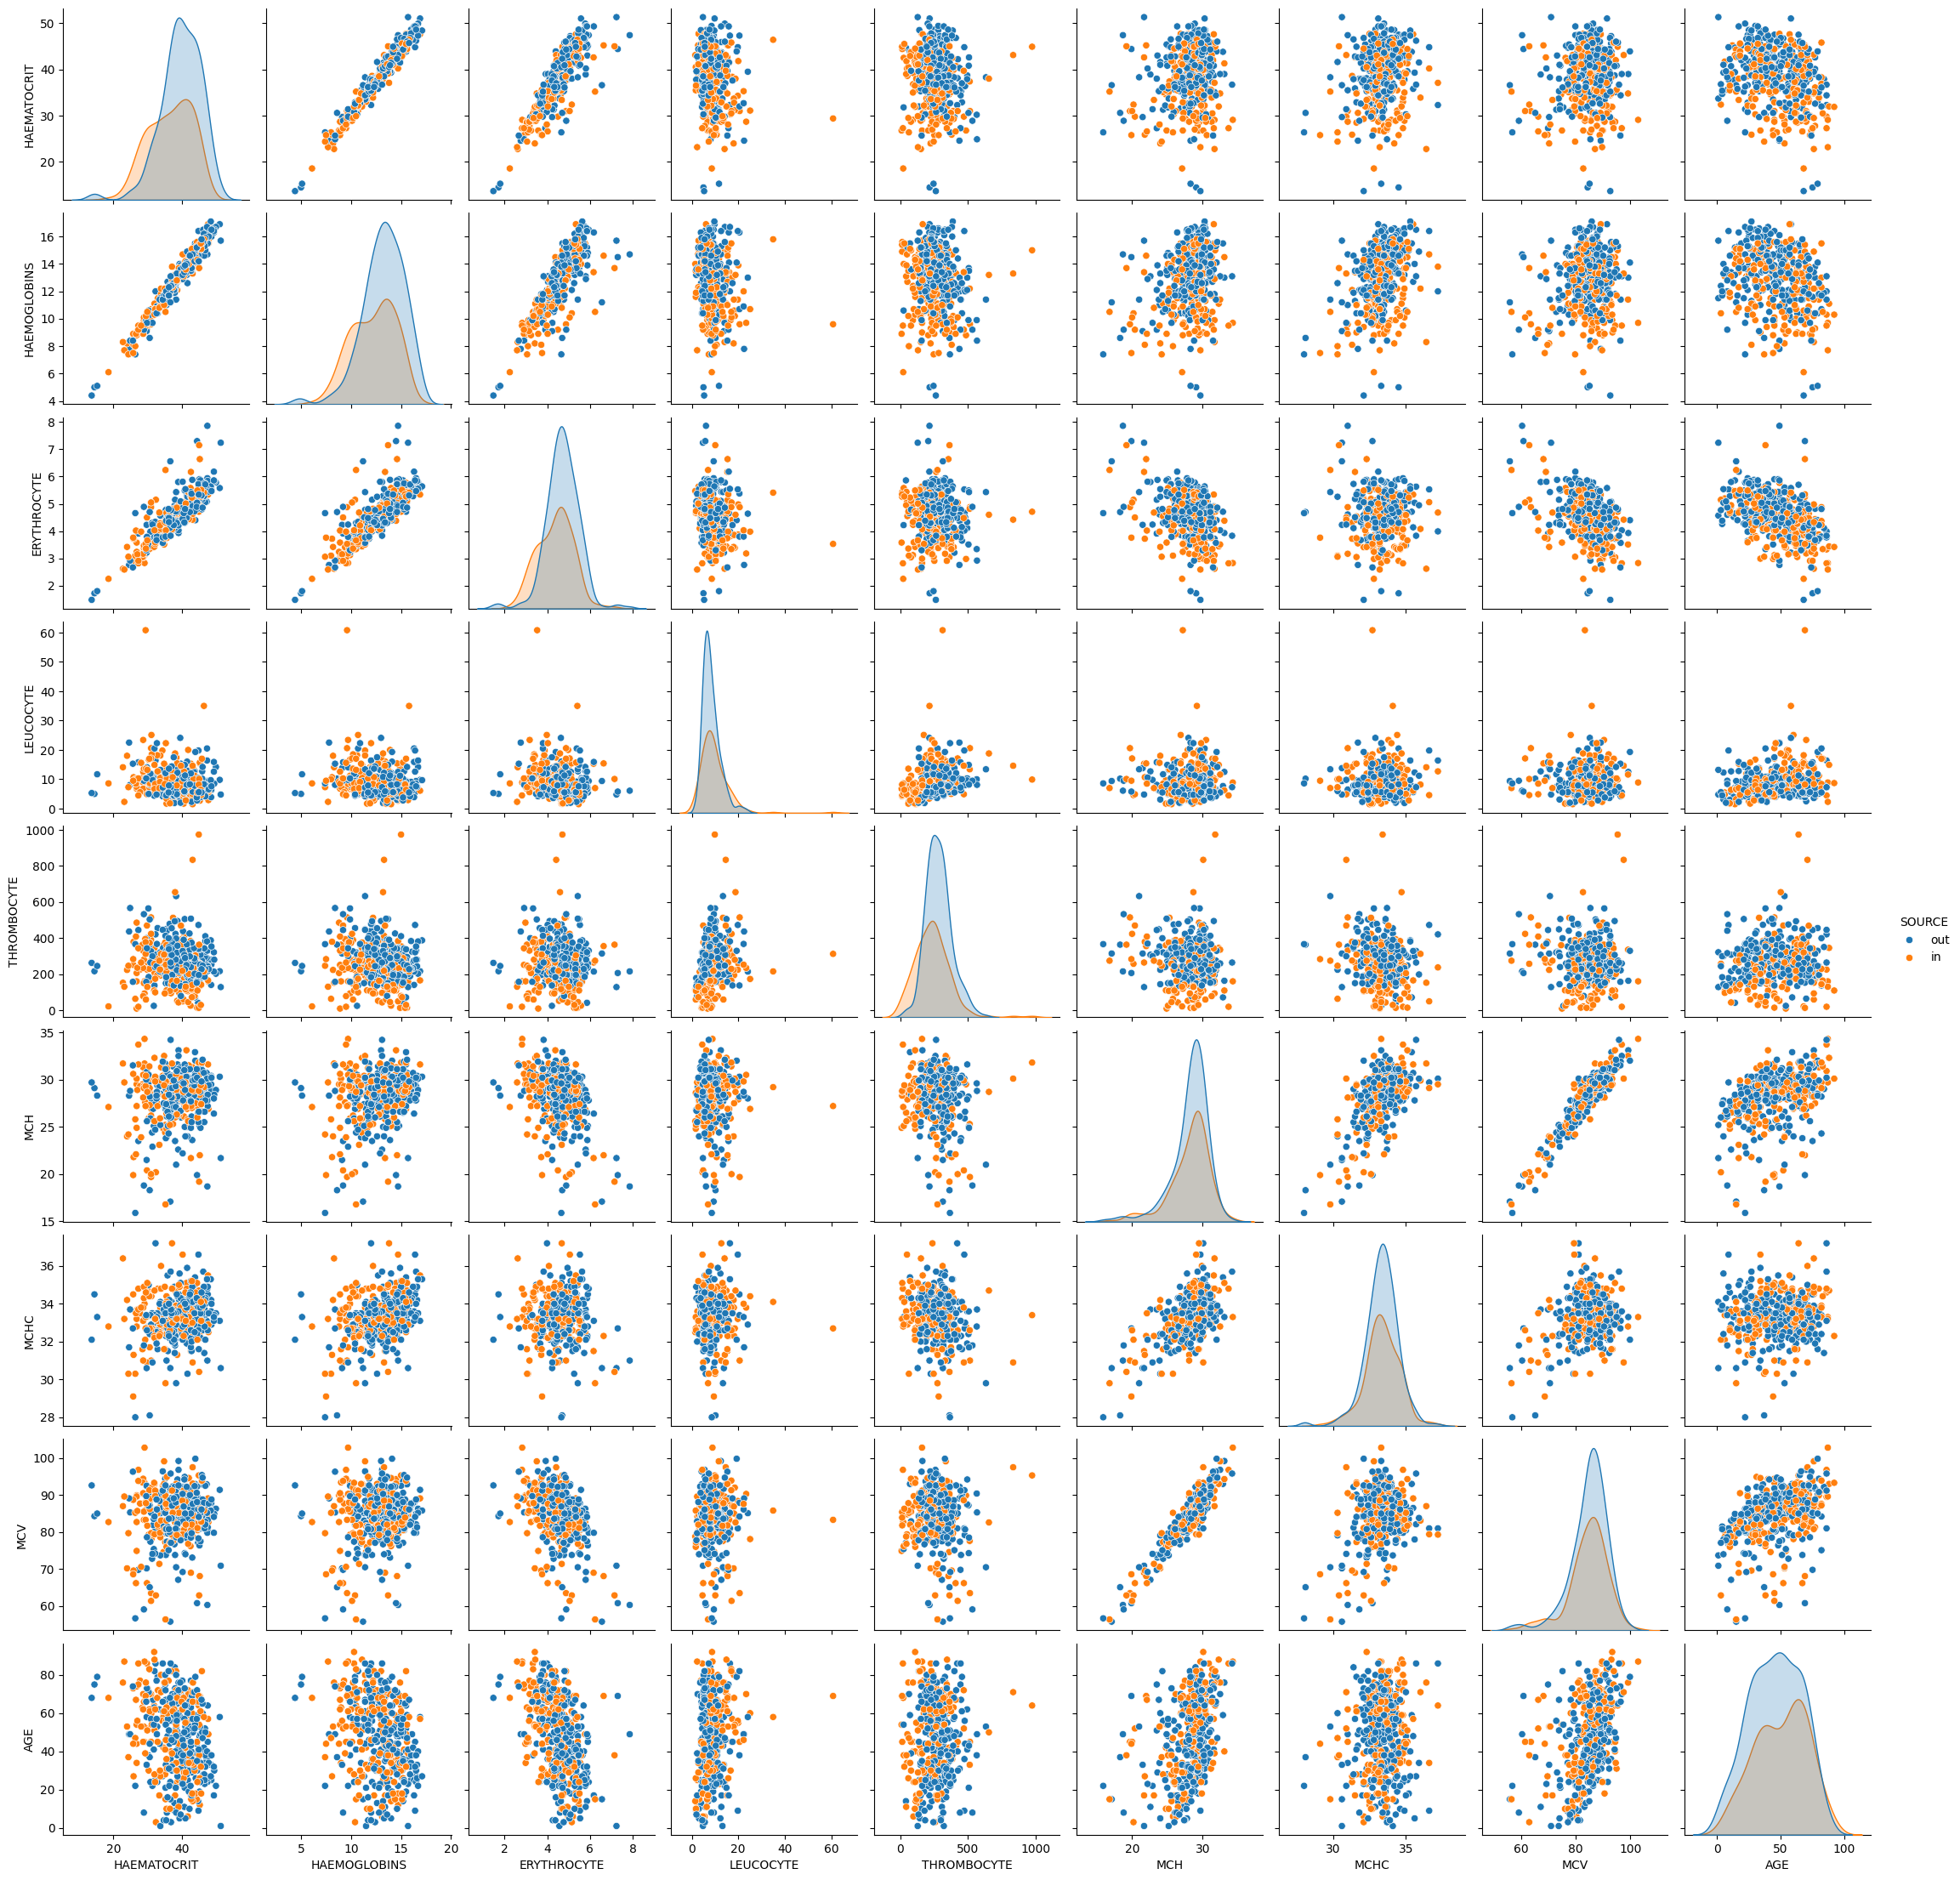

In [9]:
sns.pairplot(df_validation, hue='SOURCE')

In [10]:
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.980529,0.861222,-0.186352,-0.065349,0.132656,0.173948,0.086210,-0.274837
HAEMOGLOBINS,0.980529,1.000000,0.813528,-0.175623,-0.100252,0.240308,0.360186,0.136564,-0.255742
ERYTHROCYTE,0.861222,0.813528,1.000000,-0.159653,-0.026755,-0.353687,-0.008547,-0.418755,-0.448936
LEUCOCYTE,-0.186352,-0.175623,-0.159653,1.000000,0.269591,-0.018660,0.005123,-0.023003,0.186384
THROMBOCYTE,-0.065349,-0.100252,-0.026755,0.269591,1.000000,-0.131681,-0.202721,-0.069810,0.058410
MCH,0.132656,0.240308,-0.353687,-0.018660,-0.131681,1.000000,0.595149,0.941877,0.380614
MCHC,0.173948,0.360186,-0.008547,0.005123,-0.202721,0.595149,1.000000,0.293490,0.053617
MCV,0.086210,0.136564,-0.418755,-0.023003,-0.069810,0.941877,0.293490,1.000000,0.427705
AGE,-0.274837,-0.255742,-0.448936,0.186384,0.058410,0.380614,0.053617,0.427705,1.000000


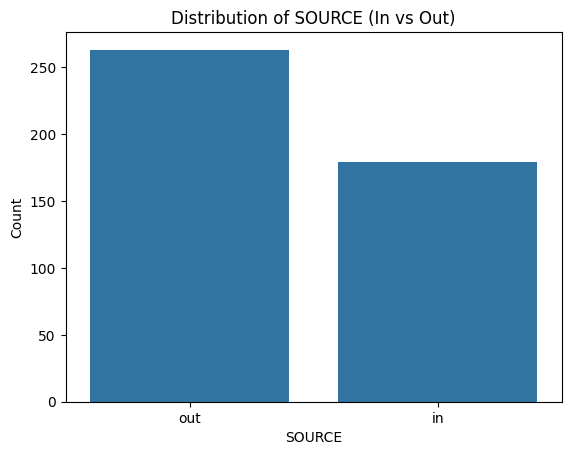

In [11]:
sns.countplot(x=df_validation['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = df_validation['SOURCE'].value_counts()
source_proportions = df_validation['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    263
in     179
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595023
in     0.404977
Name: proportion, dtype: float64
